**Task 1**

In [50]:
import pandas as pd
inventory = pd.read_csv(
    'T_F41SCHEDULE_B43.zip',
    keep_default_na=False,
    na_values=['', 'N/A', 'NULL']  # not include "NA" to keep it as a valid string
)

<ipython-input-50-1404eb7299bb>:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  inventory = pd.read_csv(


In [51]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132313 non-null  object 
 2   CARRIER_NAME         132208 non-null  object 
 3   MANUFACTURE_YEAR     132310 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132306 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132212 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

In [52]:
inventory[['UNIQUE_CARRIER_NAME','CARRIER', 'CARRIER_NAME', 'MANUFACTURE_YEAR', 'NUMBER_OF_SEATS', 'CAPACITY_IN_POUNDS', 'AIRLINE_ID']].isnull().sum()

,0
UNIQUE_CARRIER_NAME,105
CARRIER,0
CARRIER_NAME,105
MANUFACTURE_YEAR,3
NUMBER_OF_SEATS,7
CAPACITY_IN_POUNDS,101
AIRLINE_ID,105


In [53]:
inventory[inventory['CARRIER_NAME'].isnull()][['CARRIER', 'CARRIER_NAME', 'UNIQUE_CARRIER_NAME']].head()

,CARRIER,CARRIER_NAME,UNIQUE_CARRIER_NAME
11465,L4,NaN,NaN
11466,L4,NaN,NaN
11467,L4,NaN,NaN
11468,L4,NaN,NaN
11469,L4,NaN,NaN


In [54]:
inventory[inventory['MANUFACTURE_YEAR'].isnull()][['ACQUISITION_DATE', 'MANUFACTURE_YEAR', 'CAPACITY_IN_POUNDS', 'AIRLINE_ID']].head()

,ACQUISITION_DATE,MANUFACTURE_YEAR,CAPACITY_IN_POUNDS,AIRLINE_ID
116651,1/25/2022 12:00:00 AM,NaN,0.0,20007.0
124680,NaN,NaN,18055.0,20363.0
124681,NaN,NaN,18055.0,20363.0


In [55]:
inventory[inventory['NUMBER_OF_SEATS'].isnull()][['NUMBER_OF_SEATS', 'MANUFACTURE_YEAR', 'CAPACITY_IN_POUNDS', 'AIRLINE_ID']].head()

,NUMBER_OF_SEATS,MANUFACTURE_YEAR,CAPACITY_IN_POUNDS,AIRLINE_ID
97550,NaN,1982.0,96000.0,20151.0
97551,NaN,1988.0,118000.0,20151.0
97552,NaN,1988.0,118000.0,20151.0
97553,NaN,1990.0,118000.0,20151.0
97554,NaN,1991.0,118000.0,20151.0


In [56]:
inventory[inventory['CAPACITY_IN_POUNDS'].isnull()][['NUMBER_OF_SEATS', 'MANUFACTURE_YEAR', 'CAPACITY_IN_POUNDS', 'AIRLINE_ID']].head()

,NUMBER_OF_SEATS,MANUFACTURE_YEAR,CAPACITY_IN_POUNDS,AIRLINE_ID
78991,181.0,1982.0,NaN,20007.0
79015,0.0,2012.0,NaN,20007.0
79016,0.0,2012.0,NaN,20007.0
81902,0.0,1971.0,NaN,20107.0
81903,0.0,1971.0,NaN,20107.0


In [57]:
inventory[inventory['AIRLINE_ID'].isnull()][['NUMBER_OF_SEATS', 'MANUFACTURE_YEAR', 'CAPACITY_IN_POUNDS', 'AIRLINE_ID']].head()

,NUMBER_OF_SEATS,MANUFACTURE_YEAR,CAPACITY_IN_POUNDS,AIRLINE_ID
11465,74.0,2007.0,19000.0,NaN
11466,74.0,2007.0,19000.0,NaN
11467,74.0,2007.0,19000.0,NaN
11468,74.0,2007.0,19000.0,NaN
11469,74.0,2007.0,19000.0,NaN


In [58]:
inventory[inventory['AIRLINE_ID'].isnull()][['CARRIER', 'CARRIER_NAME']].value_counts()
# This suggests that for rows where AIRLINE_ID is missing, the combination of CARRIER and CARRIER_NAME is consistent!

,,count
CARRIER,CARRIER_NAME,


**Task 1 Explanation**

NA in CARRIER/UNIQUE_CARRIER for "North American Airlines" is not missing data. It's a string. I count NA is a string when reading the csv file but count "", N/A, and Null as missing data.

CARRIER doesn't have missing data. Other variables do have missing data. Checked by seeing the head of each missing columns. Proceed with deciding if any imputation is possible.

CARRIER_NAME is safe to impute because we have CARRIER and UNIQUE_CARRIER_NAME filled. This is probably due to MCAR.


MANUFACTURE_YEAR is safe to impute because it is likely due to MCAR. Mean/median imputation is acceptable.

NUMBER_OF_SEATS is safe to impute. It likely correlates with MODEL. It is probably due to MAR. Seat count is tied to aircraft design.

CAPACITY_IN_POUNDS is safe to impute. Likely MAR - tied to aircraft specs. Multiple imputation can be applied.

AIRLINE_ID is missing as its correlated CARRIER_NAME. We can impute from CARRIER. This is due to MAR. The airline ID is based on carrier.


In [59]:
# impute CARRIER_NAME
data = inventory.copy()
# create a lookup dictionary from known CARRIER values
carrier_name_map = data.dropna(subset=['CARRIER_NAME']) \
                            .drop_duplicates(subset=['CARRIER']) \
                            .set_index('CARRIER')['CARRIER_NAME'].to_dict()
# pnly fill CARRIER_NAME where it's missing and CARRIER exists in the mapping
mask = data['CARRIER_NAME'].isnull() & data['CARRIER'].isin(carrier_name_map.keys())
data.loc[mask, 'CARRIER_NAME'] = data.loc[mask, 'CARRIER'].map(carrier_name_map)
# check if CARRIER_NAME is fully imputed or not
data[['CARRIER', 'CARRIER_NAME', 'MANUFACTURE_YEAR', 'NUMBER_OF_SEATS', 'CAPACITY_IN_POUNDS', 'AIRLINE_ID']].isnull().sum()

,0
CARRIER,0
CARRIER_NAME,0
MANUFACTURE_YEAR,3
NUMBER_OF_SEATS,7
CAPACITY_IN_POUNDS,101
AIRLINE_ID,105


In [60]:
# check original data
l4_rows = inventory[inventory['CARRIER'] == 'L4'][['CARRIER', 'CARRIER_NAME']]
print(l4_rows)

      CARRIER                           CARRIER_NAME
11465      L4                                    NaN
11466      L4                                    NaN
11467      L4                                    NaN
11468      L4                                    NaN
11469      L4                                    NaN
11470      L4                                    NaN
11471      L4                                    NaN
11472      L4                                    NaN
18739      L4  Lynx Aviation d/b/a Frontier Airlines
18740      L4  Lynx Aviation d/b/a Frontier Airlines
18741      L4  Lynx Aviation d/b/a Frontier Airlines
18742      L4  Lynx Aviation d/b/a Frontier Airlines
18743      L4  Lynx Aviation d/b/a Frontier Airlines
18744      L4  Lynx Aviation d/b/a Frontier Airlines
18745      L4  Lynx Aviation d/b/a Frontier Airlines
18746      L4  Lynx Aviation d/b/a Frontier Airlines
18747      L4  Lynx Aviation d/b/a Frontier Airlines
18748      L4  Lynx Aviation d/b/a Frontier Ai

In [61]:
# check imputed data
l4_rows = data[inventory['CARRIER'] == 'L4'][['CARRIER', 'CARRIER_NAME']]
print(l4_rows)

      CARRIER                           CARRIER_NAME
11465      L4  Lynx Aviation d/b/a Frontier Airlines
11466      L4  Lynx Aviation d/b/a Frontier Airlines
11467      L4  Lynx Aviation d/b/a Frontier Airlines
11468      L4  Lynx Aviation d/b/a Frontier Airlines
11469      L4  Lynx Aviation d/b/a Frontier Airlines
11470      L4  Lynx Aviation d/b/a Frontier Airlines
11471      L4  Lynx Aviation d/b/a Frontier Airlines
11472      L4  Lynx Aviation d/b/a Frontier Airlines
18739      L4  Lynx Aviation d/b/a Frontier Airlines
18740      L4  Lynx Aviation d/b/a Frontier Airlines
18741      L4  Lynx Aviation d/b/a Frontier Airlines
18742      L4  Lynx Aviation d/b/a Frontier Airlines
18743      L4  Lynx Aviation d/b/a Frontier Airlines
18744      L4  Lynx Aviation d/b/a Frontier Airlines
18745      L4  Lynx Aviation d/b/a Frontier Airlines
18746      L4  Lynx Aviation d/b/a Frontier Airlines
18747      L4  Lynx Aviation d/b/a Frontier Airlines
18748      L4  Lynx Aviation d/b/a Frontier Ai

In [62]:
# impute MANUFACTURE_YEAR by median imputation
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

median_imputer = SimpleImputer(strategy='median')
data['MANUFACTURE_YEAR'] = median_imputer.fit_transform(data[['MANUFACTURE_YEAR']])
data[['CARRIER', 'CARRIER_NAME', 'MANUFACTURE_YEAR', 'NUMBER_OF_SEATS', 'CAPACITY_IN_POUNDS', 'AIRLINE_ID']].isnull().sum()

,0
CARRIER,0
CARRIER_NAME,0
MANUFACTURE_YEAR,0
NUMBER_OF_SEATS,7
CAPACITY_IN_POUNDS,101
AIRLINE_ID,105


In [63]:
missing_seats = inventory[inventory['NUMBER_OF_SEATS'].isnull()]
print(missing_seats[['CARRIER', 'CARRIER_NAME', 'TAIL_NUMBER', 'MODEL', 'MANUFACTURER', 'NUMBER_OF_SEATS']])

      CARRIER            CARRIER_NAME TAIL_NUMBER           MODEL  \
97550      M6  Amerijet International      N743AX  767-232SFCARGO   
97551      M6  Amerijet International      N316CM  767-338ERCARGO   
97552      M6  Amerijet International      N319CM  767-338ERCARGO   
97553      M6  Amerijet International      N373CM  767-338ERCARGO   
97554      M6  Amerijet International      N396CM  767-323ERCARGO   
97555      M6  Amerijet International      N347CM  767-323ERCARGO   
97556      M6  Amerijet International      N378CX  767-323ERCARGO   

      MANUFACTURER  NUMBER_OF_SEATS  
97550       BOEING              NaN  
97551       BOEING              NaN  
97552       BOEING              NaN  
97553       BOEING              NaN  
97554       BOEING              NaN  
97555       BOEING              NaN  
97556       BOEING              NaN  


In [64]:
# since the model is cargo plane, which means that we can impute the data to the constant 0
constant_imputer = SimpleImputer(strategy='constant')
constant_imputer.fill_value = 0
data['NUMBER_OF_SEATS'] = constant_imputer.fit_transform(data[['NUMBER_OF_SEATS']])
data[['CARRIER', 'CARRIER_NAME', 'MANUFACTURE_YEAR', 'NUMBER_OF_SEATS', 'CAPACITY_IN_POUNDS', 'AIRLINE_ID']].isnull().sum()

,0
CARRIER,0
CARRIER_NAME,0
MANUFACTURE_YEAR,0
NUMBER_OF_SEATS,0
CAPACITY_IN_POUNDS,101
AIRLINE_ID,105


In [65]:
missing_seats = inventory[inventory['CAPACITY_IN_POUNDS'].isnull()]
print(missing_seats[['CARRIER_NAME', 'MODEL', 'MANUFACTURER', 'CAPACITY_IN_POUNDS']])

                      CARRIER_NAME          MODEL      MANUFACTURER  \
78991               Atlas Air Inc.       B767-200            BOEING   
79015               Atlas Air Inc.       B767-300            BOEING   
79016               Atlas Air Inc.       B767-300            BOEING   
81902  Federal Express Corporation       DC-10-10  MCDONNELLDOUGLAS   
81903  Federal Express Corporation       DC-10-10  MCDONNELLDOUGLAS   
...                            ...            ...               ...   
82456  Federal Express Corporation          MD-11  MCDONNELLDOUGLAS   
82457  Federal Express Corporation          MD-11  MCDONNELLDOUGLAS   
82458  Federal Express Corporation          MD-11  MCDONNELLDOUGLAS   
90567             Spirit Air Lines  A-320-PSGRneo  AirbusIndustries   
90569             Spirit Air Lines  A-320-PSGRneo  AirbusIndustries   

       CAPACITY_IN_POUNDS  
78991                 NaN  
79015                 NaN  
79016                 NaN  
81902                 NaN  
81903  

In [66]:
# multiple imputation for capacity_in_pounds
!pip install miceforest plotnine
import miceforest as mf

In [67]:
num_datasets=4
kernel = mf.ImputationKernel(
  data=data.select_dtypes('number'), #only works on numeric data
  num_datasets=num_datasets,
  save_all_iterations_data=False, #always false
  random_state=1 #seed
)
kernel.mice(iterations=5)
imputed_capacity = kernel.complete_data(dataset=0)['CAPACITY_IN_POUNDS']
data['CAPACITY_IN_POUNDS'] = imputed_capacity
data[['CARRIER', 'CARRIER_NAME', 'MANUFACTURE_YEAR', 'NUMBER_OF_SEATS', 'CAPACITY_IN_POUNDS', 'AIRLINE_ID']].isnull().sum()

,0
CARRIER,0
CARRIER_NAME,0
MANUFACTURE_YEAR,0
NUMBER_OF_SEATS,0
CAPACITY_IN_POUNDS,0
AIRLINE_ID,105


In [68]:
# check if carrier_name and airline_id are always missing together
inventory[['CARRIER_NAME', 'AIRLINE_ID']].isnull().sum()


,0
CARRIER_NAME,105
AIRLINE_ID,105


In [69]:
# check rows where one is missing but the other is not
mismatch = inventory[
    inventory['CARRIER_NAME'].isnull() & inventory['AIRLINE_ID'].notnull() |
    inventory['CARRIER_NAME'].notnull() & inventory['AIRLINE_ID'].isnull()
]
print(f"Mismatched rows: {len(mismatch)}")

Mismatched rows: 0


In [70]:
# Drop rows where airline_id or carrier_name is missing
mapping_df = data[['CARRIER_NAME', 'AIRLINE_ID']].dropna()

# Drop duplicates to ensure unique mapping
carrier_to_airline_id = mapping_df.drop_duplicates().set_index('CARRIER_NAME')['AIRLINE_ID'].to_dict()
# Fill missing AIRLINE_ID using the carrier_name
data['AIRLINE_ID'] = data.apply(
    lambda row: carrier_to_airline_id[row['CARRIER_NAME']]
    if pd.isnull(row['AIRLINE_ID']) and row['CARRIER_NAME'] in carrier_to_airline_id
    else row['AIRLINE_ID'],
    axis=1
)
data[['CARRIER', 'CARRIER_NAME', 'MANUFACTURE_YEAR', 'NUMBER_OF_SEATS', 'CAPACITY_IN_POUNDS', 'AIRLINE_ID']].isnull().sum()

,0
CARRIER,0
CARRIER_NAME,0
MANUFACTURE_YEAR,0
NUMBER_OF_SEATS,0
CAPACITY_IN_POUNDS,0
AIRLINE_ID,0


Now, there is no NA for those columns after imputation for all of them.

**Task 2**
look for typos, uppercase and lowercase

In [71]:
# manufacturer
inventory['MANUFACTURER'].value_counts()
# upper case and lowercase issues

,count
MANUFACTURER,
BOEING,15922
Embraer,11508
THEBOEINGCO,9223
Bombardier,8871
Boeing,8392
...,...
BEECHHAWKER400XP,1
Dassault-Falcon-2000EXEASy,1
ISRAELAIRCRAFTINDUSTRIES,1


In [72]:
# Convert to uppercase and strip whitespace
data['MANUFACTURER'] = data['MANUFACTURER'].str.upper().str.strip()
data['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
BOEING,27159
EMBRAER,15554
AIRBUS,13440
BOMBARDIER,11834
THEBOEINGCO,9231
...,...
ROLLS-ROYCE,1
MCDONNEL,1
DASSAULT-FALCON-2000EXEASY,1


In [73]:
# mapping dict
manufacturer_map = {
    'BOEING': 'BOEING',
    'THEBOEINGCO': 'BOEING',
    'BOEINGCO': 'BOEING',
    'BOEINGCOMPANY': 'BOEING',
    'THEBOEINGCOMPANY': 'BOEING',
    'AIRBUS': 'AIRBUS',
    'AIRBUSINDUSTRIE': 'AIRBUS',
    'AIRBUSINDUSTRIES': 'AIRBUS',
    'AIRBUSCOMPANY': 'AIRBUS',
    'EMBRAER': 'EMBRAER',
    'BOMBARDIER': 'BOMBARDIER',
    'BOMBARDIERAEROSPACE': 'BOMBARDIER',
    'MCDONNELL-DOUGLAS': 'MCDONNELL DOUGLAS',
    'MCDONNELLDOUGLAS': 'MCDONNELL DOUGLAS',
    'MCDONNELDOUGLAS': 'MCDONNELL DOUGLAS',
    'MCDO': 'MCDONNELL DOUGLAS',
    'DOUGLAS': 'DOUGLAS',
    'DOUGLASAIRCRAFT': 'DOUGLAS'
}

data['MANUFACTURER'] = data['MANUFACTURER'].map(manufacturer_map).fillna(data['MANUFACTURER'])
data['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
BOEING,54933
AIRBUS,23513
EMBRAER,15554
BOMBARDIER,12483
MCDONNELL DOUGLAS,9300
...,...
MCDONNEL,1
AMA/EXPR,1
DASSAULT-FALCON-2000EXEASY,1


This is the best attempt for standardizing Manufacturer. The number of unique manufacturer decreases due to standarization, which is expected.

In [74]:
# model inspection
inventory['MODEL'].value_counts()

,count
MODEL,
EMB-145,2614
B-737-7H4,2470
B737-823,2370
A320-232,2333
A321-231,2259
...,...
A321-231(P2F),1
777FFX,1
T210N,1


In [75]:
# Convert to uppercase and strip whitespace
data['MODEL'] = data['MODEL'].str.upper().str.strip()
data['MODEL'].value_counts()

,count
MODEL,
EMB-145,2976
B-737-7H4,2470
B737-823,2370
A320-232,2333
A321-231,2259
...,...
MD-9030,1
777FFX,1
747-48EF,1


In [76]:
# clean up the common manufacturer identifiers or config tags
import re
# normalize MODEL text
data['MODEL'] = data['MODEL'].astype(str).str.upper().str.strip()

def clean_model(model):
    remove_keywords = [
        'PASSENGERONLY', 'PAX', 'PASSENGER', 'FREIGHTER', 'COMBI',
        'CARGO', 'JET', 'CO', 'CO.', 'INC', 'LTD'
    ]
    # remove any of the keywords from the model
    for kw in remove_keywords:
        model = re.sub(rf'\b{kw}\b', '', model)
    # collapse extra whitespace or hyphens
    model = re.sub(r'\s+', ' ', model).strip()
    model = re.sub(r'-+', '-', model).strip('- ')
    return model


data['MODEL'] = data['MODEL'].apply(clean_model)
data['MODEL'].value_counts()

,count
MODEL,
EMB-145,2976
B-737-7H4,2470
B737-823,2370
A320-232,2333
A321-231,2259
...,...
757-230ER,1
EMBRAERERJ-145,1
777FFX,1


In [77]:
# AIRCRAFT_STATUS
# inspect
data['AIRCRAFT_STATUS'].value_counts(dropna=False)

,count
AIRCRAFT_STATUS,
O,79487
b,30852
B,12699
a,7804
A,1330
L,122
o,19


In [78]:
# standardize by capitalization
data['AIRCRAFT_STATUS'] = data['AIRCRAFT_STATUS'].astype(str).str.upper()
data['AIRCRAFT_STATUS'].value_counts()

,count
AIRCRAFT_STATUS,
O,79506
B,43551
A,9134
L,122


In [79]:
# OPERATING_STATUS
data['OPERATING_STATUS'].value_counts()

,count
OPERATING_STATUS,
Y,126577
N,5664
y,71
,1


In [80]:
# standardize by capitalization
data['OPERATING_STATUS'] = data['OPERATING_STATUS'].astype(str).str.upper()
data['OPERATING_STATUS'].value_counts()

,count
OPERATING_STATUS,
Y,126648
N,5664
,1


**Task 3**

In [81]:
# drop rows with any missing values
cleaned_data = data.dropna()

# report the number of remaining rows
print(f"Remaining rows: {len(cleaned_data)}")
print(f"Original number of rows: {len(inventory)}")

Remaining rows: 101316
Original number of rows: 132313


**Task 4**

Skewness of NUMBER_OF_SEATS is: 0.3779649862249041
Skewness of CAPACITY_IN_POUNDS is: 3.766052520334328


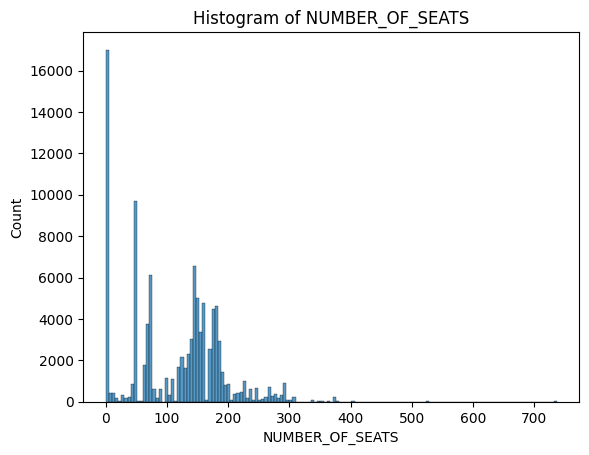

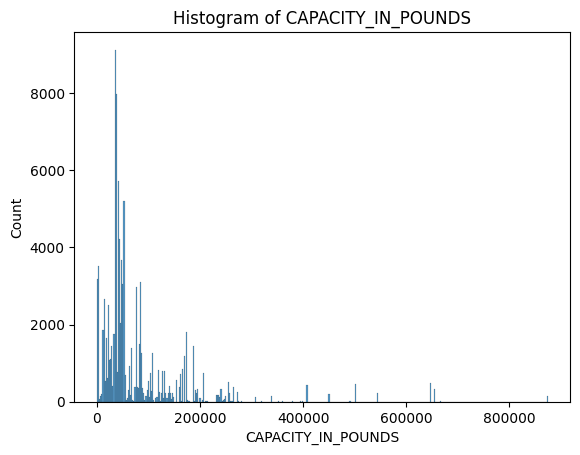

In [82]:
#1: check skewness and plot histograms for NUMBER_OF_SEATS and CAPACITY_IN_POUNDS
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
def plot_histogram(data, column_name):
    sns.histplot(data[column_name])
    plt.title(f'Histogram of {column_name}')
    plt.show()

print(f"Skewness of NUMBER_OF_SEATS is: {cleaned_data['NUMBER_OF_SEATS'].skew()}")
print(f"Skewness of CAPACITY_IN_POUNDS is: {cleaned_data['CAPACITY_IN_POUNDS'].skew()}")

# histograms
plot_histogram(cleaned_data, 'NUMBER_OF_SEATS')
plot_histogram(cleaned_data, 'CAPACITY_IN_POUNDS')

In [84]:
#2: Box-Cox transformation, which requires positive values
cleaned_data['NUMBER_OF_SEATS_BOXCOX'],_ = stats.boxcox(cleaned_data['NUMBER_OF_SEATS']+1) # +1 to ensure positive values
cleaned_data['CAPACITY_IN_POUNDS_BOXCOX'],_ = stats.boxcox(cleaned_data['CAPACITY_IN_POUNDS']+1)


<ipython-input-84-1dfe6c1164f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['NUMBER_OF_SEATS_BOXCOX'],_ = stats.boxcox(cleaned_data['NUMBER_OF_SEATS']+1) # +1 to ensure positive values
<ipython-input-84-1dfe6c1164f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['CAPACITY_IN_POUNDS_BOXCOX'],_ = stats.boxcox(cleaned_data['CAPACITY_IN_POUNDS']+1)


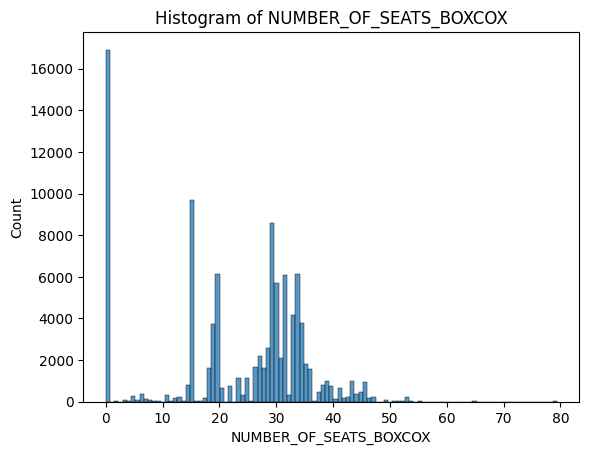

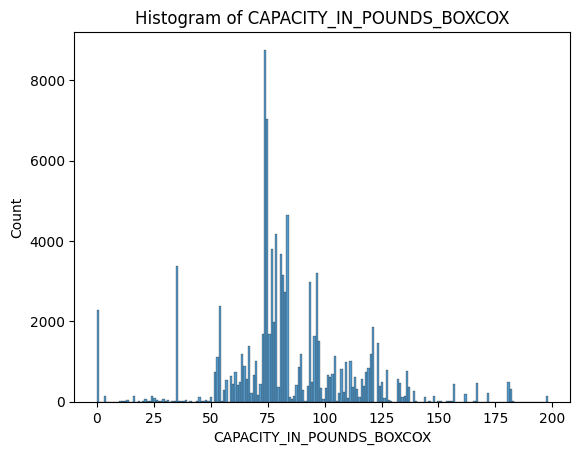

In [85]:
#3: histograms for transformed variables
plot_histogram(cleaned_data, 'NUMBER_OF_SEATS_BOXCOX')
plot_histogram(cleaned_data, 'CAPACITY_IN_POUNDS_BOXCOX')

Observation: Box-cox transformation reduces skewness and normalizes the data. The two distributions look more symmetric and resemble a normal distribution. The transformation also adjusts the scale of the data. The x-axis number have changed. The transformation seems to make extreme values more compressed and alter the scale.

**Task 5**

In [86]:
#1 quantiles and SIZE column
q1 = cleaned_data['NUMBER_OF_SEATS'].quantile(0.25)
q2 = cleaned_data['NUMBER_OF_SEATS'].quantile(0.50)
q3 = cleaned_data['NUMBER_OF_SEATS'].quantile(0.75)

# function to categorize sizes
def categorize_size(seats):
    if seats < q1:
        return 'SMALL'
    elif q1 <= seats < q2:
        return 'MEDIUM'
    elif q2 <= seats < q3:
        return 'LARGE'
    else:
        return 'XLARGE'

cleaned_data['SIZE'] = cleaned_data['NUMBER_OF_SEATS'].apply(categorize_size)

<ipython-input-86-ad9e3d654417>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['SIZE'] = cleaned_data['NUMBER_OF_SEATS'].apply(categorize_size)


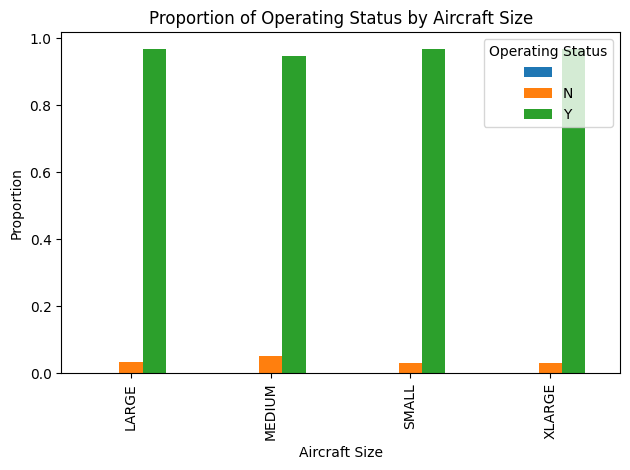

Number of null values in OPERATING_STATUS: 0


In [91]:
#2 operating status per size
operating_proportion = cleaned_data.groupby('SIZE')['OPERATING_STATUS'].value_counts(normalize=True).unstack()
#normalize=True means we get percentages instead of raw numbers

# side-by-side bars
operating_proportion.plot(kind='bar')

plt.title('Proportion of Operating Status by Aircraft Size')
plt.ylabel('Proportion')
plt.xlabel('Aircraft Size')
plt.legend(title='Operating Status')
plt.tight_layout()
plt.show()

null_count = cleaned_data['OPERATING_STATUS'].isnull().sum()
print(f"Number of null values in OPERATING_STATUS: {null_count}")
# hmm not sure why there's a blue legend on the plot.
# There is no null values for operating status

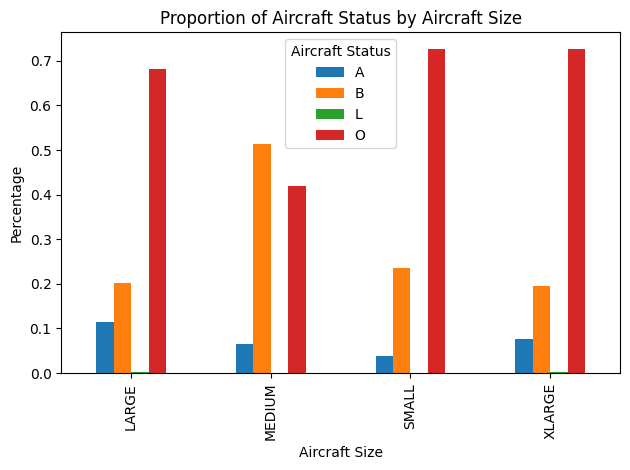

In [92]:
#3 aircraft status per size
status_proportion = cleaned_data.groupby('SIZE')['AIRCRAFT_STATUS'].value_counts(normalize=True).unstack()
# side-by-side bars
status_proportion.plot(kind='bar')

plt.title('Proportion of Aircraft Status by Aircraft Size')
plt.ylabel('Percentage')
plt.xlabel('Aircraft Size')
plt.legend(title='Aircraft Status')
plt.tight_layout()
plt.show()


Summary of findings: most planes are in operation. Medium sized plan has more non-operating planes by proportion. For the aircraft status, large, small, and xlarge airplanes have proportionally more "O" status. Medium-zized aircrafts have proportionally more "B" status. Status "L" is relatively less in all aircraft sizes.